## Processing Documents/ Textual Data

Documents , Other Data Which are not processed are called **Corpus**. Which almost always have to

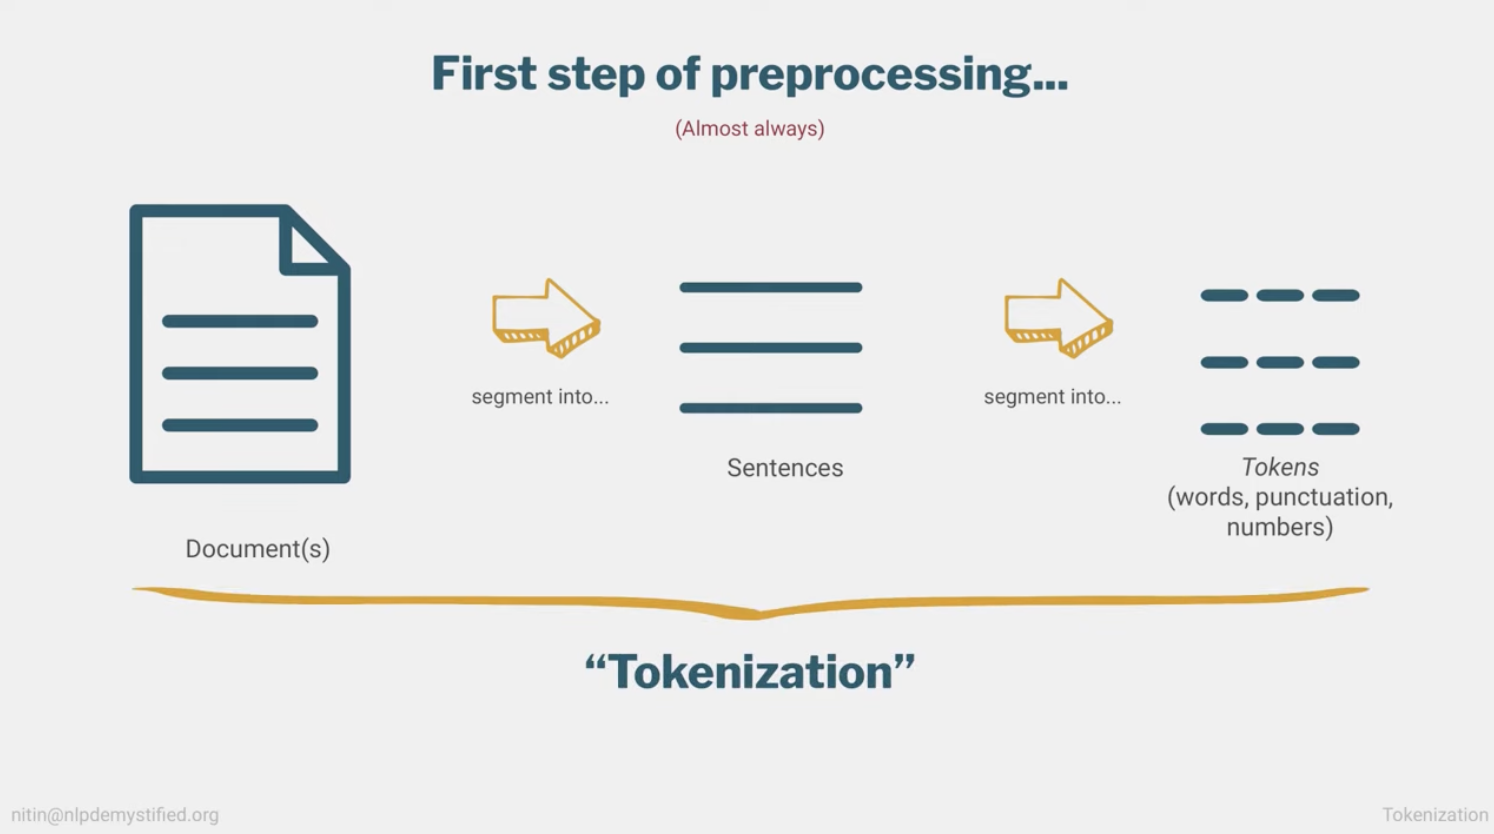


### Example

txt = "He didn't want to pay $20 for the book."

txt.split(" ")

`['He', "didn't", 'want', 'to', 'pay', '$20', 'for', 'the', 'book.']`

Simple above approach won't work

**Word**: The Smallest unit of speech that carries some meaning on its own

**Morpheme**: The Smallest Unit of Speech which has meaning, but doesn't necessarily stand on its own. For Ex: -ing, re-, pre-, un-

**Grapheme**: the smalllest functional unit of language.For English: It's Letters


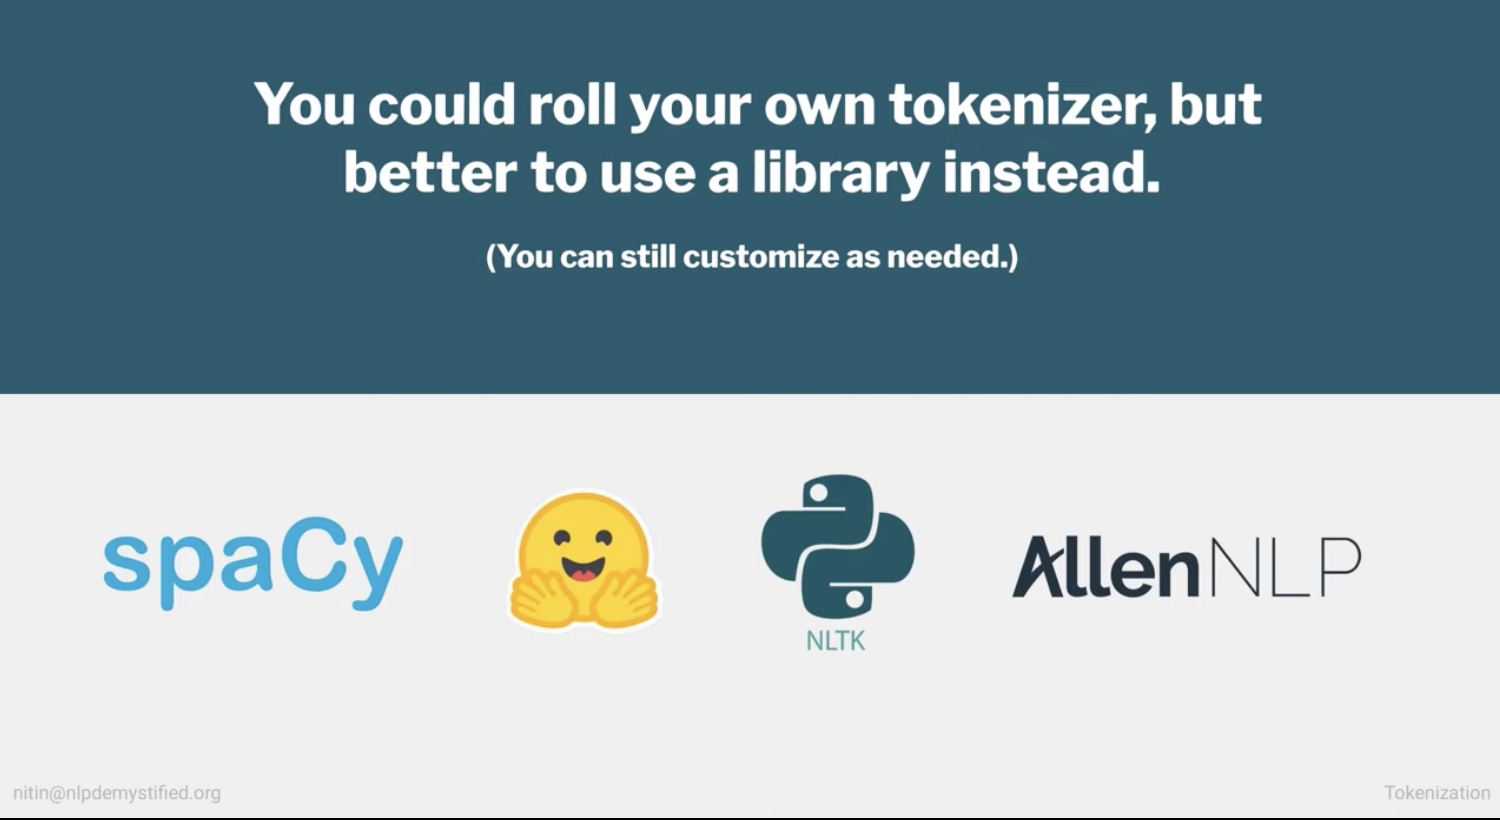

In [1]:
txt = "He didn't want to pay $20 for the book."

In [2]:
txt.split(" ")

['He', "didn't", 'want', 'to', 'pay', '$20', 'for', 'the', 'book.']

In [3]:
import spacy

/Users/niteshkumarsharma/Desktop/Desktop/NLP/.nlp_dem/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
space_lang_model = 'en_core_web_sm'

In [5]:
nlp = spacy.load(space_lang_model)

## Tokenization with SpaCy

In [6]:
s = "He didn't want to pay $20 for this book."
doc = nlp(s)

In [7]:
print([x.text for x in doc])

['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'for', 'this', 'book', '.']


In [8]:
doc[2]

n't

In [9]:
type(doc[0:3])

spacy.tokens.span.Span

In [10]:
doc.text

"He didn't want to pay $20 for this book."

### Tokenising Multiple Sentences

In [11]:
s = """Either the well was very deep, or she fell very slowly, for she 
had plenty of time as she went down to look about her and to wonder what 
was going to happen next. First, she tried to look down and make out what 
she was coming to, but it was too dark to see anything; then she looked at 
the sides of the well, and noticed that they were filled with cupboards and 
book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc = nlp(s)

# Look at individual sentences (there should be two 'Span' objects).
print([sent for sent in doc.sents])

[Either the well was very deep, or she fell very slowly, for she 
had plenty of time as she went down to look about her and to wonder what 
was going to happen next., First, she tried to look down and make out what 
she was coming to, but it was too dark to see anything; then she looked at 
the sides of the well, and noticed that they were filled with cupboards and 
book-shelves; here and there she saw maps and pictures hung upon pegs.]


In [12]:
for sent in doc.sents:
    print("-------------")
    print(sent)

-------------
Either the well was very deep, or she fell very slowly, for she 
had plenty of time as she went down to look about her and to wonder what 
was going to happen next.
-------------
First, she tried to look down and make out what 
she was coming to, but it was too dark to see anything; then she looked at 
the sides of the well, and noticed that they were filled with cupboards and 
book-shelves; here and there she saw maps and pictures hung upon pegs.


In [13]:
type(sent)

spacy.tokens.span.Span

In [26]:
chk = "He didn't want to pay $20 for this book."
doc = nlp(chk)

for i, token_doc in enumerate(doc):
    if token_doc.is_currency:
        print(token_doc.text + doc[i+1].text)

$20


In [17]:
doc[0].

0

In [19]:
vv = nlp("Give it back! He pleaded.")

In [22]:
give_subtree = vv[0].subtree

In [23]:
[t.text for t in give_subtree]

['Give', 'it', 'back', '!']

## spaCy Linguistic Features

In [27]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [28]:
type(doc)

spacy.tokens.doc.Doc

In [29]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [37]:
spacy.explain("pcomp")

'complement of preposition'

## Visualizing spaCy

In [42]:
from spacy import displacy

In [70]:
doc = nlp("My name is Priyanka and I native place is New York. I'm currently working as software Developer in AB-inBev")

In [48]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", options=options, jupyter=True)

In [47]:
spacy.explain("attr")

'attribute'

In [57]:
import nltk
from nltk.tokenize import TreebankWordDetokenizer, word_tokenize

s = "Let's go to N.Y.C. for the weekend."

In [58]:
tbd = TreebankWordDetokenizer()

In [59]:
word_tokenize(s)

['Let', "'s", 'go', 'to', 'N.Y.C', '.', 'for', 'the', 'weekend', '.']

In [61]:
[x.text for x in nlp(s)]

['Let', "'s", 'go', 'to', 'N.Y.C.', 'for', 'the', 'weekend', '.']

In [71]:
displacy.render(doc, style='ent', jupyter=True)

In [69]:
spacy.explain('gpe')

/Users/niteshkumarsharma/Desktop/Desktop/NLP/.nlp_dem/lib/python3.9/site-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'gpe' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


## PreProcessing Pipeline

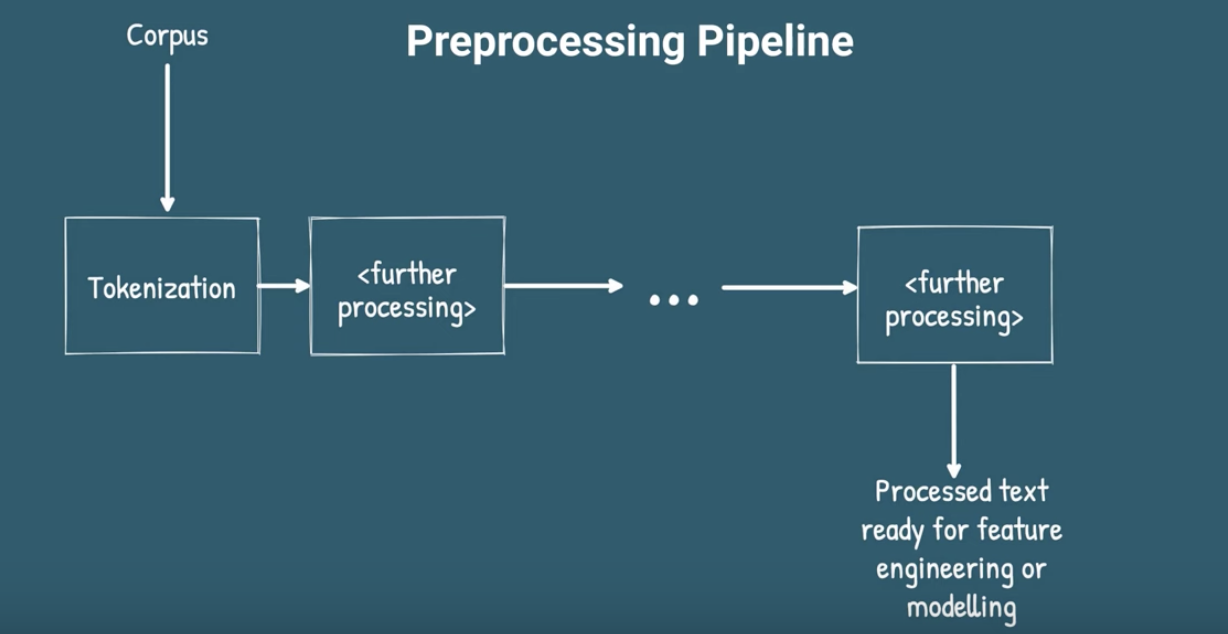

### Basic Preprocessing

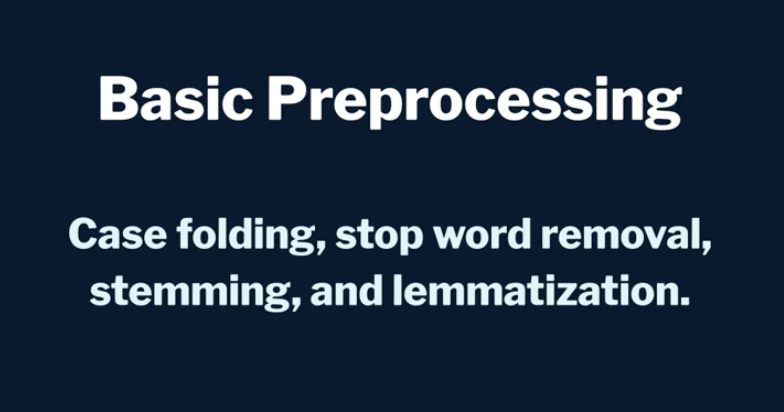

### Case Folding

All Tokens are made to be Lower or upper casing 

**Vocabulary**: The set of all `unique` tokens in a corpus

#### Reasons
1. Smaller vocab can be more effiecnet in space and computation and leads to higer number of search hits("recall") in information retrieval

`Mr. Cook went into the kitchen to cook dinner`

#### With Case Folding
* `dinner, into , kitchen, mr, the, to, went, cook`

#### Without Case Folding
* `cook, dinner, into , kitchen, mr, the, to, went, Cook`

#### Downside
1. Information loss: "Cook" as a person is different from "cook" as an activity, which can lead to poorer quality search results("precision")

In [72]:
s = "He told Dr. Lovato that he was done with the tests and would post the results shortly."
doc = nlp(s)

In [73]:
print([t.lower_ for t in doc])

['he', 'told', 'dr.', 'lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'tests', 'and', 'would', 'post', 'the', 'results', 'shortly', '.']


In [74]:
print([t.lower_ if not t.is_sent_start else t for t in doc])

[He, 'told', 'dr.', 'lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'tests', 'and', 'would', 'post', 'the', 'results', 'shortly', '.']


### Stop Word Removal

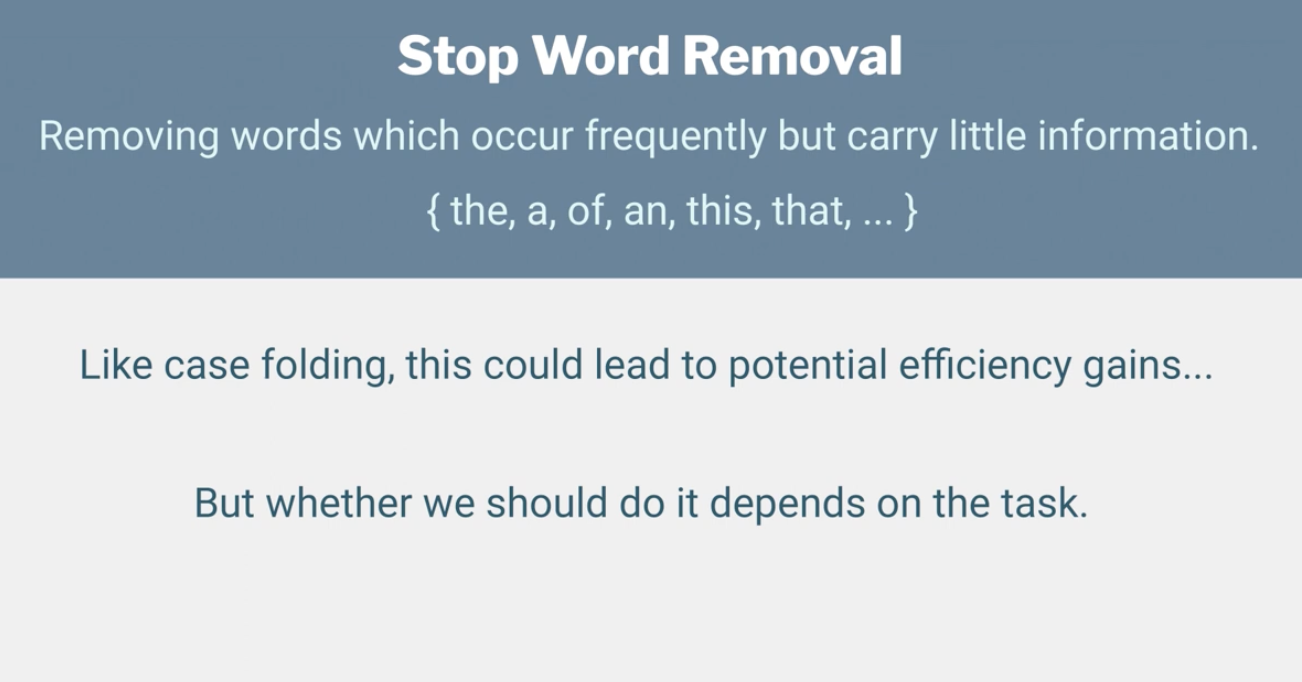

#### Usage

1. stop words are not useful for model and storage like `Topic Modelling`


#### Limitation

Analysis where stop words really matter, like `Sentiment Analysis`

`doc_sentiment = nlp("I saw the movie last night. I was not amused.")`

`print([t for t in doc_sentiment if not t.is_stop])`

**Output**: `[saw, movie, night, ., amused, .]`




In [ ]:
## list of stop words in depends on package
## Something that can be modified depending on use case

In [79]:
doc_sentiment = nlp("I saw the movie last night. I was not amused.")

In [80]:
print([t for t in doc_sentiment if not t.is_stop])

[saw, movie, night, ., amused, .]


#### Adding and Removing Custom Stop Words in spaCy

In [108]:
## Removing a word from a Stop Words List

nlp = spacy.load(space_lang_model)
nlp.Defaults.stop_words.add("not")

In [109]:
doc_sentiment = nlp("I saw the movie last night. I was not amused.")
print([t for t in doc_sentiment if not t.is_stop])

[saw, movie, night, ., amused, .]


### Stemming

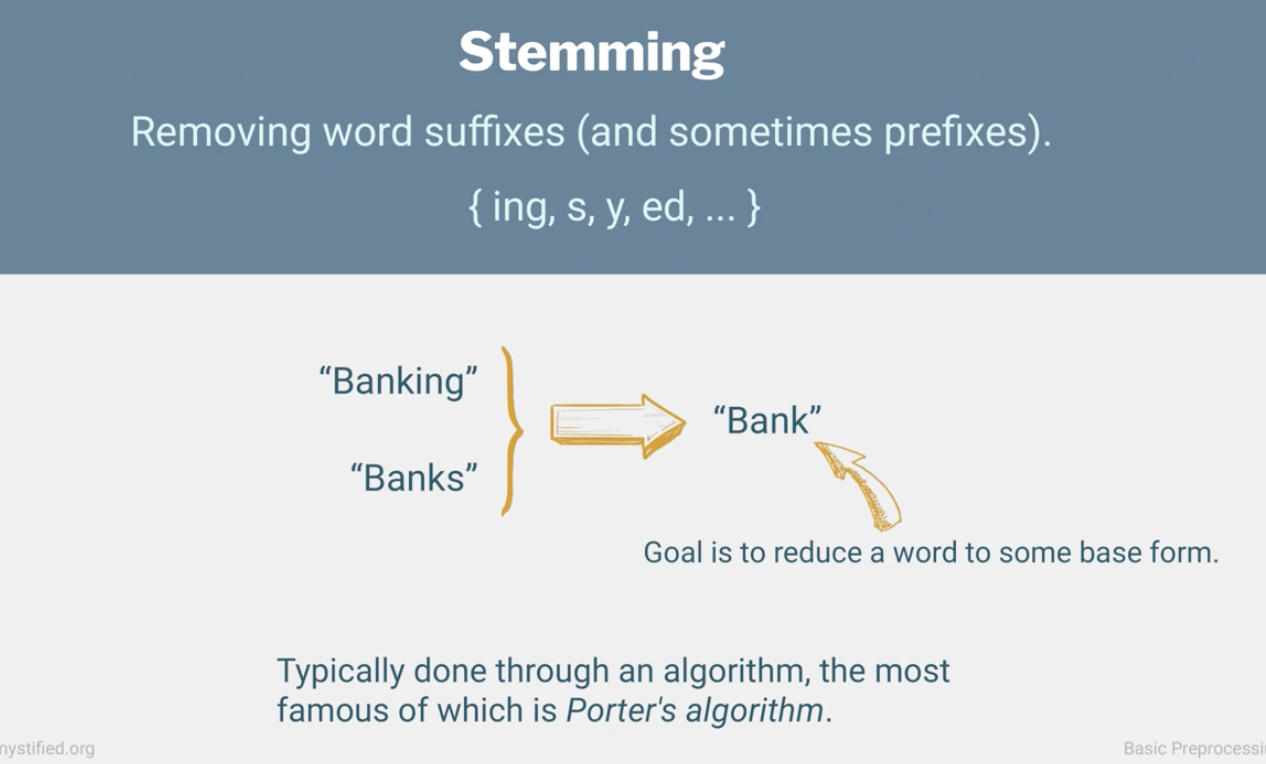

> A Stemmed word may not be a valid word

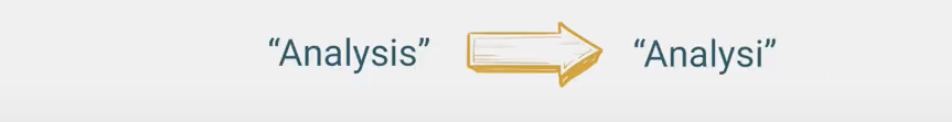

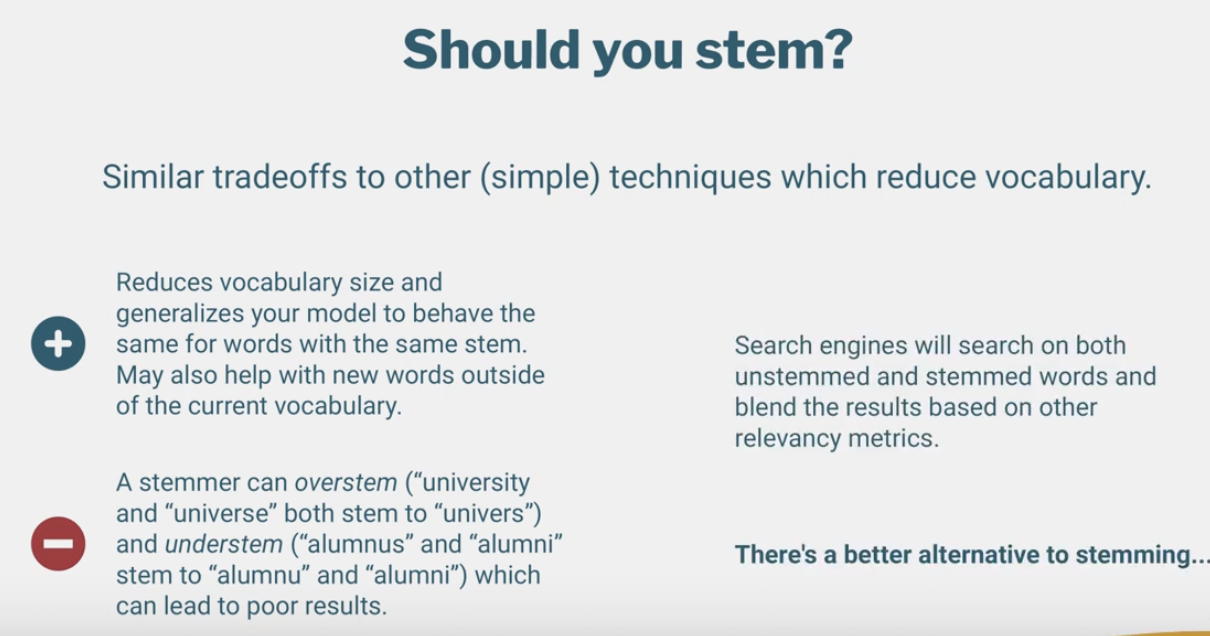

In [89]:
## spaCy doesn't support stemming natively, but nltk does

from nltk.stem.snowball import SnowballStemmer
s = 'He told Dr. Lovato that he was done with the tests and would post the results shortly.'

stemmer = SnowballStemmer(language="english")

In [94]:
stemmer.stem(s)

'he told dr. lovato that he was done with the tests and would post the results shortly.'

In [96]:
print([stemmer.stem(x.text) for x in doc])

['he', 'told', 'dr.', 'lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'test', 'and', 'would', 'post', 'the', 'result', 'short', '.']


### Lemmatization

Reduce a word down to its `lemma`, or dictionary form.

(more sophisticated than stemming)

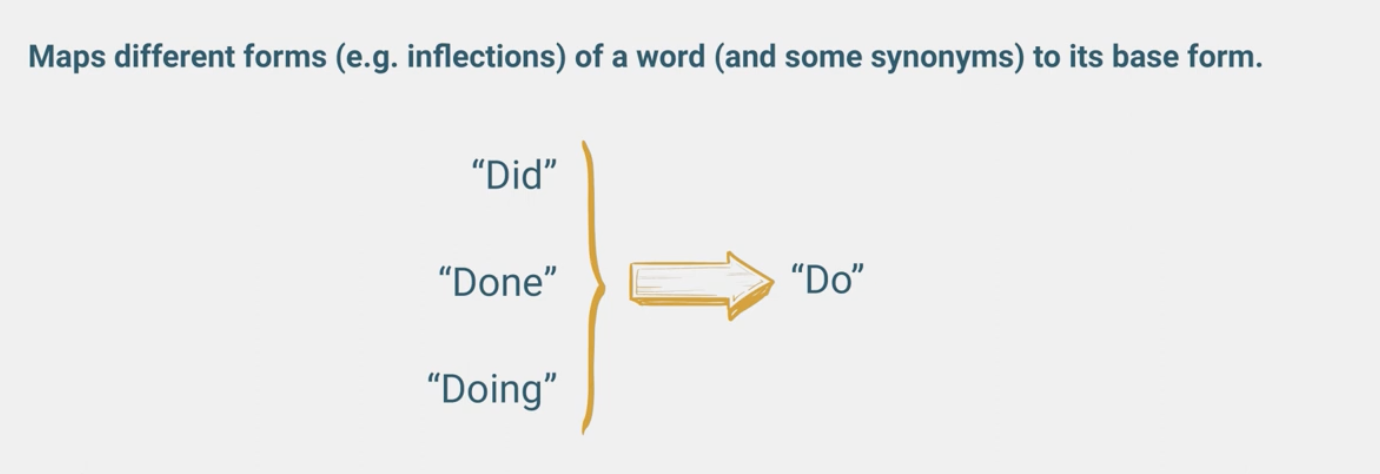


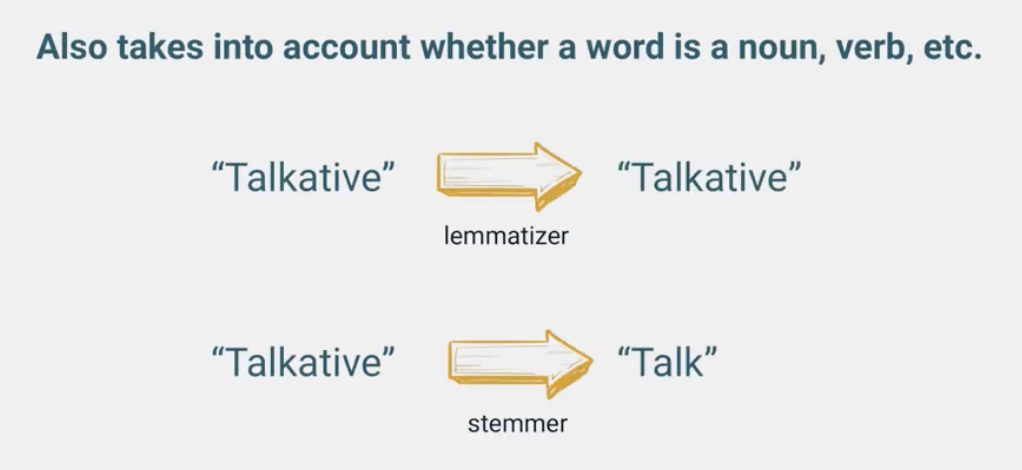

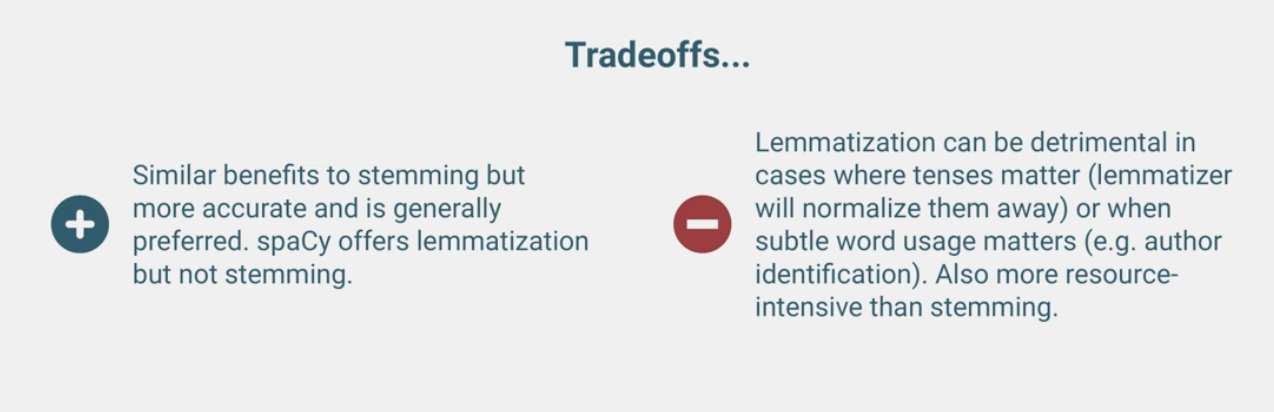



####

In [85]:
[(t.text, t.lemma_) for t in doc]

[('He', 'he'),
 ('told', 'tell'),
 ('Dr.', 'Dr.'),
 ('Lovato', 'Lovato'),
 ('that', 'that'),
 ('he', 'he'),
 ('was', 'be'),
 ('done', 'do'),
 ('with', 'with'),
 ('the', 'the'),
 ('tests', 'test'),
 ('and', 'and'),
 ('would', 'would'),
 ('post', 'post'),
 ('the', 'the'),
 ('results', 'result'),
 ('shortly', 'shortly'),
 ('.', '.')]